# Imports

In [1]:
from __future__ import print_function



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
import sklearn.model_selection as ms
from sklearn import linear_model


from IPython.display import display

from scipy import stats


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns


pd.set_option('display.max_columns', None)
pd.reset_option('display.min_rows', None)

# Dataset

In [155]:
X = pd.read_pickle("./train_set.pkl")

y = pd.read_pickle("./y.pkl")

#test_1st = pd.read_pickle("./test_set.pkl")
test_2nd = pd.read_pickle("./test_set.pkl")

In [156]:
test_2nd

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,YrSold,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__150,MSSubClass__160,MSSubClass__180,MSSubClass__190,MoSold__2,MoSold__3,MoSold__4,MoSold__5,MoSold__6,MoSold__7,MoSold__8,MoSold__9,MoSold__10,MoSold__11,MoSold__12,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Alley__NoAlley,Alley__Pave,LotShape__IR2,LotShape__IR3,LotShape__Reg,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,Neighborhood__Band_2,Neighborhood__Band_3,Neighborhood__Band_4,Neighborhood__Band_5,Neighborhood__Band_6,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkFace,MasVnrType__NoMasVnr,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__NA,BsmtFinType1__Rec,BsmtFinType1__Unf,Electrical__FuseF,Electrical__FuseP,Electrical__SBrkr,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sev,Functional__Typ,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,GarageFinish__NA,GarageFinish__RFn,GarageFinish__Unf,PavedDrive__P,PavedDrive__Y,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__NoFence,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
0,80.0,9.360655,1,5,6,51,51,0.0,3,3,3,1,270.0,882.0,3,1,896,0,896,0.0,0.0,1,0,2,1,3,5,0,0,51,1.0,730.0,3,140,0,0,120,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,81.0,9.565704,1,6,6,54,54,108.0,3,3,3,1,406.0,1329.0,3,1,1329,0,1329,0.0,0.0,1,1,3,1,4,6,0,0,54,1.0,312.0,3,393,36,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,74.0,9.534595,1,5,5,15,14,0.0,3,3,4,1,137.0,928.0,4,1,928,701,1629,0.0,0.0,2,1,3,1,3,6,1,3,15,2.0,482.0,3,212,34,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,

# Linear Regression

In [4]:
lin_reg = LinearRegression()



# Lasso Model 

In [5]:
## Finding the best Alpha (Lambda)
test_error_mean = []
parameters = {}
alpha_l = np.logspace(-9,-3,100)

for i in alpha_l:
    lasso = Lasso(alpha = i, normalize=True)
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(X)
    MSE = np.sqrt(-cross_val_score(lasso,X,y,scoring = 'neg_mean_squared_error', cv=kf))
    test_error_mean.append(np.mean(MSE))
    parameters[test_error_mean[-1]] = i
    
df_test_mse = pd.DataFrame(test_error_mean, index=alpha_l)
best_alpha = parameters[min(parameters)]

print("MSE Min:", round(min(parameters),4))
print("Best Alpha:", round(best_alpha,7))

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.224662632951745, tolerance: 0.015940356315860965
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.158062288277608, tolerance: 0.01567253121107395
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.074751061496373, tolerance: 0.01573530996786403
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.032538819747291, tolerance: 0.01573530996786403
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.036205302849138, tolerance: 0.016146102480235174
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9466899599256484, tolerance: 0.016436330411533695
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.876603020940611, tolerance: 0.016436330411533695
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.111161694749823, tolerance: 0.015940356315860965
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.963487248500963, tolerance: 0.01567253121107395
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.939662827029944, tolerance: 0.015940356315860965
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.656325127051468, tolerance: 0.01567253121107395
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6764167510327233, tolerance: 0.01573530996786403
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0732431167116463, tolerance: 0.01567253121107395
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.200821540925732, tolerance: 0.01573530996786403
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.206643628589557, tolerance: 0.016146102480235174
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.341131610584764, tolerance: 0.016146102480235174
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6412239289587816, tolerance: 0.016436330411533695
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.670709384668477, tolerance: 0.015940356315860965
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.670825107743147, tolerance: 0.016436330411533695
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5172887197015332, tolerance: 0.015940356315860965
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7911232326170321, tolerance: 0.01567253121107395
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2583545585600904, tolerance: 0.015940356315860965
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13482023584500613, tolerance: 0.01567253121107395
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3580308729138366, tolerance: 0.01573530996786403
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03884715752426171, tolerance: 0.016146102480235174
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07134236137228633, tolerance: 0.016436330411533695
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018372956462883394, tolerance: 0.01573530996786403
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

MSE Min: 0.118
Best Alpha: 2.66e-05


In [6]:
parameters

{0.12345589025120163: 1e-09,
 0.12345547319118626: 1.1497569953977357e-09,
 0.12345499517528613: 1.3219411484660288e-09,
 0.12345444739094255: 1.519911082952933e-09,
 0.12345382007021106: 1.747528400007683e-09,
 0.12345310211661031: 2.009233002565046e-09,
 0.12345228108626718: 2.310129700083158e-09,
 0.12345134862579013: 2.656087782946684e-09,
 0.12345027837149329: 3.0538555088334124e-09,
 0.12344904817795146: 3.5111917342151273e-09,
 0.12344762848839204: 4.0370172585965495e-09,
 0.12344601105141398: 4.641588833612773e-09,
 0.12344417094428553: 5.336699231206302e-09,
 0.12344209453634511: 6.135907273413163e-09,
 0.12343974343686673: 7.054802310718631e-09,
 0.12343707382382638: 8.11130830789689e-09,
 0.1234340734341712: 9.32603346883218e-09,
 0.12343071546775079: 1.0722672220103231e-08,
 0.12342695327494675: 1.232846739442066e-08,
 0.12342280064880802: 1.4174741629268047e-08,
 0.12341822066279051: 1.6297508346206433e-08,
 0.12341322631388574: 1.873817422860383e-08,
 0.12341031187158621:

In [8]:
## Find potential features to drop using Lasso
parameter = {}
Col = []
Lasso_Coef = []
alpha_lasso = np.logspace(-9,-3,100)

for i in alpha_lasso:
    for j in range(5):
        lasso = Lasso(alpha =i,normalize=True)
        coef_lasso = []
        test_error = []
        x_train, x_test, y_train, y_test = ms.train_test_split(X,y,test_size=1.0/5,random_state=j)
        lasso.set_params(alpha=i).fit(x_train, y_train)
        Lasso_Coef.append(lasso.coef_)
        COEF = pd.DataFrame(Lasso_Coef, columns=x_train.columns)

COEF = COEF.groupby(np.arange(len(COEF.index))//5).mean()
zero_feature = []
zero_dict = {}
df_dict = {}

for i in range(99):
    new_feature = []
    df = COEF.loc[[i],]
    zero_feature.append(df.loc[:,(df == 0).any()].columns)
    
    if i>0:
        for feature in zero_feature[i]:
            if (feature in zero_feature[i-1]) == False:
                new_feature.append(feature)
        if new_feature != []:
            zero_dict[i]=new_feature
            for feature in new_feature:
                df_dict[feature] = alpha_lasso[i]
            print(new_feature)
            print('lambda =:', alpha_lasso[i])
            print('*'*100)
        

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.017528164212237, tolerance: 0.016258090189713522
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9346647566023027, tolerance: 0.016217690605424703
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.227068174392974, tolerance: 0.016318187538383263
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8902719149177525, tolerance: 0.016217690605424703
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.106601775995443, tolerance: 0.016318187538383263
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.149872341735623, tolerance: 0.016308018513624557
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8217275034422107, tolerance: 0.016318187538383263
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.1162460667909695, tolerance: 0.016308018513624557
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4245609990384414, tolerance: 0.0158021590079963
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.039894820880289, tolerance: 0.016308018513624557
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1947471335153583, tolerance: 0.0158021590079963
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2028727868516516, tolerance: 0.016258090189713522
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6381713168397702, tolerance: 0.0158021590079963
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3543944965759627, tolerance: 0.016258090189713522
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7925839253734117, tolerance: 0.016217690605424703
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1348123598964963, tolerance: 0.016258090189713522
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1075014075060259, tolerance: 0.016217690605424703
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.156396659363021, tolerance: 0.016318187538383263
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6627643225592648, tolerance: 0.016217690605424703
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4157346315090713, tolerance: 0.016318187538383263
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.691786373792633, tolerance: 0.016308018513624557
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4384964616690024, tolerance: 0.016308018513624557
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018274319764186586, tolerance: 0.0158021590079963
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028068300976977767, tolerance: 0.016217690605424703
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

['MSSubClass__120']
lambda =: 5.72236765935022e-06
****************************************************************************************************
['2ndFlrSF', 'Exterior1st__CemntBd', 'Exterior2nd__MetalSd', 'GarageType__Attchd']
lambda =: 1.5199110829529332e-05
****************************************************************************************************
['BldgType__2fmCon', 'HouseStyle__2Story', 'RoofStyle__Hip', 'MasVnrType__BrkFace']
lambda =: 1.747528400007683e-05
****************************************************************************************************
['HouseStyle__1Story', 'Exterior2nd__Plywood', 'GarageFinish__NA']
lambda =: 2.0092330025650458e-05
****************************************************************************************************
['Functional__Min2']
lambda =: 2.310129700083158e-05
****************************************************************************************************
['Exterior2nd__VinylSd']
lambda =: 2.6560877829466896e-05
*

In [9]:
n_zero_order = np.where(alpha_lasso == best_alpha)[0][0]
train_2nd = X.copy()
train_2nd.drop(list(zero_feature[n_zero_order]),axis = 1, inplace = True)

In [10]:
test_new = test_1st.copy()
test_new.drop(list(zero_feature[n_zero_order]),axis = 1, inplace = True)

In [11]:

feature = df_dict.items()
pd.DataFrame(feature,columns = ['Features','Lambda']).sort_values('Lambda', ascending = True).head(10)

,Features,Lambda
1,2ndFlrSF,0.000015
3,Exterior2nd__MetalSd,0.000015
4,GarageType__Attchd,0.000015
5,BldgType__2fmCon,0.000017
6,HouseStyle__2Story,0.000017
7,RoofStyle__Hip,0.000017
8,MasVnrType__BrkFace,0.000017
9,HouseStyle__1Story,0.000020
12,Functional__Min2,0.000023
13,Exterior2nd__VinylSd,0.000027


In [301]:
list(zero_feature[n_zero_order])

['2ndFlrSF',
 'BldgType__2fmCon',
 'HouseStyle__1Story',
 'HouseStyle__2Story',
 'RoofStyle__Hip',
 'Exterior1st__CemntBd',
 'Exterior2nd__MetalSd',
 'Exterior2nd__VinylSd',
 'MasVnrType__BrkFace',
 'Functional__Min2',
 'GarageType__Attchd']

In [13]:
test_new

,Id,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,YrSold,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__150,MSSubClass__160,MSSubClass__180,MSSubClass__190,MoSold__2,MoSold__3,MoSold__4,MoSold__5,MoSold__6,MoSold__7,MoSold__8,MoSold__9,MoSold__10,MoSold__11,MoSold__12,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Alley__NoAlley,Alley__Pave,LotShape__IR2,LotShape__IR3,LotShape__Reg,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,Neighborhood__Band_2,Neighborhood__Band_3,Neighborhood__Band_4,Neighborhood__Band_5,Neighborhood__Band_6,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Unf,HouseStyle__2.5Unf,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Mansard,RoofStyle__Shed,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__HdBoard,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__NoMasVnr,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__NA,BsmtFinType1__Rec,BsmtFinType1__Unf,Electrical__FuseF,Electrical__FuseP,Electrical__SBrkr,Functional__Maj2,Functional__Min1,Functional__Mod,Functional__Sev,Functional__Typ,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,GarageFinish__NA,GarageFinish__RFn,GarageFinish__Unf,PavedDrive__P,PavedDrive__Y,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__NoFence,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
0,1461,80.0,9.360655,1,5,6,51,51,0.0,3,3,3,1,270.0,882.0,3,1,896,896,0.0,0.0,1,0,2,1,3,5,0,0,51,1.0,730.0,3,140,0,0,120,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1462,81.0,9.565704,1,6,6,54,54,108.0,3,3,3,1,406.0,1329.0,3,1,1329,1329,0.0,0.0,1,1,3,1,4,6,0,0,54,1.0,312.0,3,393,36,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1463,74.0,9.534595,1,5,5,15,14,0.0,3,3,4,1,137.0,928.0,4,1,928,1629,0.0,0.0,2,1,3,1,3,6,1,3,15,2.0,482.0,3,212,34,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1464,78.0,9.208138,1,6,6,14,14,2

In [14]:
lasso  = Lasso()
alphas = np.logspace(-9,-3,100)
lasso.set_params(normalize=True)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(train_2nd, y)  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = train_2nd.columns)  
coefs_lasso.head()

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9599163803921238, tolerance: 0.019986645391964562
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.959922658608301, tolerance: 0.019986645391964562
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9599296032938875, tolerance: 0.019986645391964562
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9560329217117962, tolerance: 0.019986645391964562
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9564760244674826, tolerance: 0.019986645391964562
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9569854122957997, tolerance: 0.019986645391964562
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,YrSold,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MoSold__2,MoSold__3,MoSold__4,MoSold__5,MoSold__6,MoSold__7,MoSold__8,MoSold__9,MoSold__10,MoSold__11,MoSold__12,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Alley__NoAlley,Alley__Pave,LotShape__IR2,LotShape__IR3,LotShape__Reg,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,Neighborhood__Band_2,Neighborhood__Band_3,Neighborhood__Band_4,Neighborhood__Band_5,Neighborhood__Band_6,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Unf,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Mansard,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stone,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__NoMasVnr,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__NA,BsmtFinType1__Rec,BsmtFinType1__Unf,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,Functional__Maj2,Functional__Min1,Functional__Mod,Functional__Typ,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,GarageFinish__NA,GarageFinish__RFn,GarageFinish__Unf,PavedDrive__P,PavedDrive__Y,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__NoFence,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
1.000000e-09,0.000182,0.080823,-0.009460,0.042937,0.039948,-0.001454,-0.000626,0.000014,0.008017,-0.009117,0.008484,0.009145,-0.000057,0.000164,0.014941,0.063537,0.000023,0.000236,0.02519,0.004896,0.026451,0.046661,-0.011398,-0.041762,0.015806,0.003093,0.011814,0.00481,0.000109,0.025597,0.000041,0.039861,0.000067,0.000093,0.000115,0.00023,-0.000678,0.002554,-0.028969,-0.038384,0.011005,0.031259,-0.021054,0.053469,-0.100139,-0.036793,0.043803,-0.034981,0.018073,-0.039788,-0.002061,-0.011365,-0.001655,0.003850,-0.004159,0.020428,0.014135,0.013825,0.005588,-0.010066,-0.004139,0.004374,0.017958,0.476345,0.426328,0.405607,0.391261,0.005569,0.017173,0.018326,0.027982,0.008668,0.057156,-0.009002,0.005024,0.015454,-0.031026,-0.088721,-0.008286,-0.008838,0.018247,0.039105,0.040484,0.107000,0.040201,0.083460,-0.026700,0.087207,-0.021700,0.070555,0.089959,0.098810,0.022001,-0.038308,-0.026216,0.002965,0.024074,0.132411,-0.044962,0.050057,0.002371,-0.033971,-0.017788,-0.059271,-0.331149,0.109336,-0.053335,-0.020244,-0.094913,0.045735,-0.031941,0.143932,0.022246,0.024542,-0.015542,0.027620,0.072512,0.175452,-0.049037,0.008880,0.044380,0.039551,0.056671,-0.033732,0.046214,0.017729,0.032199,

No handles with labels found to put in legend.


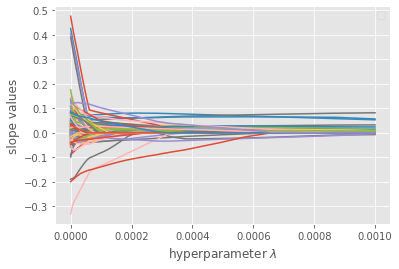

In [15]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name])
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)  

In [16]:
print('Numbers of Features Dropped:', X.shape[1]-train_2nd.shape[1])
feature = df_dict.items()
pd.DataFrame(feature,columns = ['Features','Lambda']).sort_values('Lambda', ascending = True).head(12)

Numbers of Features Dropped: 11


,Features,Lambda
1,2ndFlrSF,0.000015
3,Exterior2nd__MetalSd,0.000015
4,GarageType__Attchd,0.000015
5,BldgType__2fmCon,0.000017
6,HouseStyle__2Story,0.000017
7,RoofStyle__Hip,0.000017
8,MasVnrType__BrkFace,0.000017
9,HouseStyle__1Story,0.000020
12,Functional__Min2,0.000023
13,Exterior2nd__VinylSd,0.000027


In [17]:
## Running Lasso Regression on data before the drops
lasso = Lasso(alpha = 2.66e-05, normalize=True)
kf_b4 = KFold(5, shuffle=True, random_state=42).get_n_splits(X.values)
mse_b4= np.sqrt(-cross_val_score(lasso, X.values, y, scoring="neg_mean_squared_error", cv = kf_b4))

In [259]:
## Running Lasso Regression on data after the drops/ then compare

lasso = Lasso(alpha = best_alpha, normalize=True)

kf_after = KFold(5, shuffle=True, random_state=42).get_n_splits(train_2nd.values)
mse_after = np.sqrt(-cross_val_score(lasso, train_2nd.values, y, scoring="neg_mean_squared_error", cv = kf_after))

lasso_scores_b4 = ms.cross_val_score(lasso, X, y ,cv=5)
lasso_scores_after = ms.cross_val_score(lasso, train_2nd.values, y ,cv=5)

print("R2 before Dropping is:", round(np.mean(lasso_scores_b4),4),"/","RMSE before Dropping:",round(np.mean(mse_b4),5))
print("R2 std before Dropping is:", round(np.std(lasso_scores_b4),4),"/","RMSE Std before Dropping:",round(np.std(mse_b4),5))
print('-'*75)

print("R2 after Dropping is:", round(np.mean(lasso_scores_after),4),"/","RMSE after Dropping:",round(np.mean(mse_after),5))
print("R2 std after Dropping is:", round(np.std(lasso_scores_after),4),"/","RMSE Std after Dropping:",round(np.std(mse_after),5))


R2 before Dropping is: 0.9171 / RMSE before Dropping: 0.11801
R2 std before Dropping is: 0.0087 / RMSE Std before Dropping: 0.00295
---------------------------------------------------------------------------
R2 after Dropping is: 0.9165 / RMSE after Dropping: 0.11784
R2 std after Dropping is: 0.0094 / RMSE Std after Dropping: 0.00315


In [264]:
.11801**2

0.0139263601

In [218]:
x_train, x_test, y_train, y_test = ms.train_test_split(train_2nd,y,test_size=1.0/5)
lasso = Lasso(alpha = 2.66e-05, normalize=True)
model_lasso = lasso.fit(x_train, y_train)

ypred_lasso = model_lasso.predict(x_test)
score = model_lasso.score(x_test, y_test)
mse = mean_squared_error(y_test, ypred_lasso)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.4f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.924, MSE:0.01, RMSE:0.1135


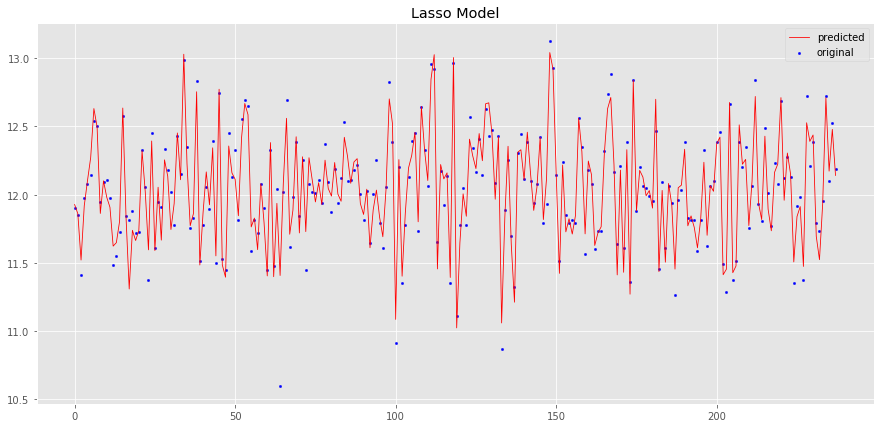

In [219]:
matplotlib.rcParams['figure.figsize'] = (15,7)
x_ax = range(len(x_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred_lasso, lw=0.8, color="red", label="predicted")
plt.title('Lasso Model')
plt.legend()
plt.show()

#  Ridge Model

RMSE Min: 0.1229
Best Alpha: 0.1


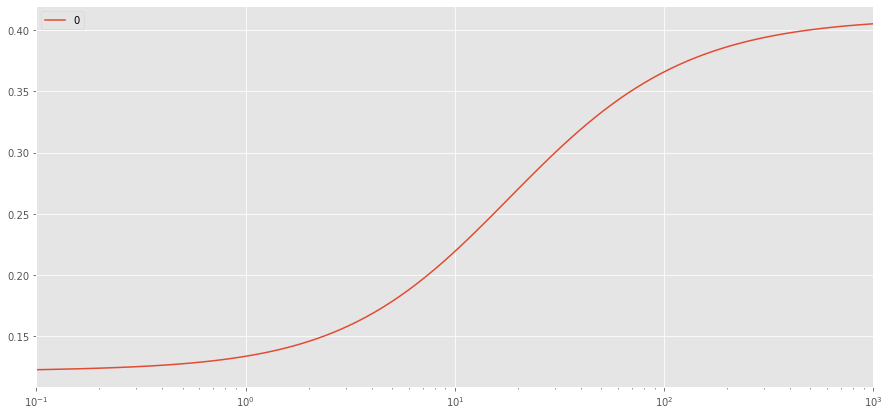

In [21]:
# Finding the best Alpha for Ridge Model
test_error_mean=[]
parameter = {}
alpha_ridge = np.logspace(-1, 3, 100)
for i in alpha_ridge:
    ridge = Ridge(alpha = i, normalize=True)
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train_2nd.values)
    rmse = np.sqrt(-cross_val_score(ridge, train_2nd.values, y, scoring="neg_mean_squared_error", cv = kf))
    test_error_mean.append(np.mean(rmse))
    parameter[test_error_mean[-1]] = i

df_test_mean = pd.DataFrame(test_error_mean, index=alpha_ridge)
ridge_best_alpha = parameter[min(parameter)]
print("RMSE Min:",round(min(parameter), 4))
print("Best Alpha:", round(ridge_best_alpha, 3))
df_test_mean.plot(logx=True)

In [274]:
# Getting the numbers for before the dropped features
ridge = Ridge(0.1,normalize=True)
kf_r_b4 = KFold(6, shuffle=True, random_state=42).get_n_splits(X.values)
rmse_r_b4= np.sqrt(-cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv = kf_r_b4))

In [275]:
ridge = Ridge(ridge_best_alpha,normalize=True) 


kf_r_after = KFold(6, shuffle=True, random_state=42).get_n_splits(train_2nd.values)
rmse_r_after= np.sqrt(-cross_val_score(ridge, train_2nd.values, y, scoring="neg_mean_squared_error", cv = kf_r_after))
ridge_scores_b4 = ms.cross_val_score(ridge, X, y ,cv=5)
ridge_scores_after = ms.cross_val_score(ridge, train_2nd.values, y ,cv=5)
print("R2 before Dropping is:", round(np.mean(ridge_scores_b4),4),"/","RMSE before Dropping:",round(np.mean(rmse_r_b4),4))
print("R2 std before Dropping is:", round(np.std(ridge_scores_b4),4),"/","RMSE Std before Dropping:",round(np.std(rmse_r_b4),5))
print('-'*75)
print("R2 after Dropping is:", round(np.mean(ridge_scores_after),4),"/","RMSE after Dropping:",round(np.mean(rmse_r_after),4))
print("R2 std after Dropping is:", round(np.std(ridge_scores_after),4),"/","RMSE Std after Dropping:",round(np.std(rmse_r_after),5))

R2 before Dropping is: 0.9099 / RMSE before Dropping: 0.1225
R2 std before Dropping is: 0.0079 / RMSE Std before Dropping: 0.00328
---------------------------------------------------------------------------
R2 after Dropping is: 0.9094 / RMSE after Dropping: 0.1222
R2 std after Dropping is: 0.01 / RMSE Std after Dropping: 0.00311


In [276]:
0.1225**2

0.015006249999999999

In [24]:
x_train, x_test, y_train, y_test = ms.train_test_split(train_2nd,y,test_size=1.0/5)
ridge1 = Ridge(alpha=0.1, normalize=True)
model_ridge = ridge1.fit(x_train, y_train)
coefs_ridge = model_ridge.coef_
#print('Coef:',(model_ridge.coef_))
print('intercept:' ,model_ridge.intercept_)


intercept: 9.82885379985856


In [216]:
alphas = np.logspace(-9, 3, 100)
lasso.set_params(normalize=True)
coefs_lasso  = []
scores = []
for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(train_2nd, y)  
        coefs_lasso.append(lasso.coef_)
        scores.append(lasso.score(train_2nd, y))

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9628384007774855, tolerance: 0.019986645391964562
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9628496565771174, tolerance: 0.019986645391964562
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9628645277418402, tolerance: 0.019986645391964562
  positive)
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

No handles with labels found to put in legend.


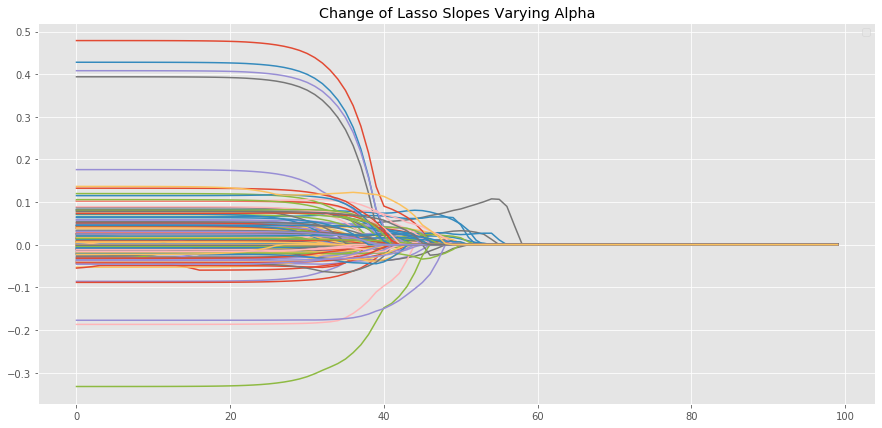

In [217]:
coefs_lasso = pd.DataFrame(np.array(coefs_lasso), columns=train_2nd.columns)
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name])
plt.legend(loc=1)    
plt.title('Change of Lasso Slopes Varying Alpha')
plt.savefig('Change of Lasso Slopes Varying Alpha', dpi=250)

In [296]:
elastic = ElasticNet(random_state=0)
alphas = np.logspace(1e-3,20,200)
elastic.set_params(normalize=True)
coefs  = []
scores = []
for alpha in alphas:
        elastic.set_params(alpha=alpha)
        elastic.fit(train_2nd, y)  
        coefs.append(elastic.coef_)
        scores.append(elastic.score(train_2nd, y))


No handles with labels found to put in legend.


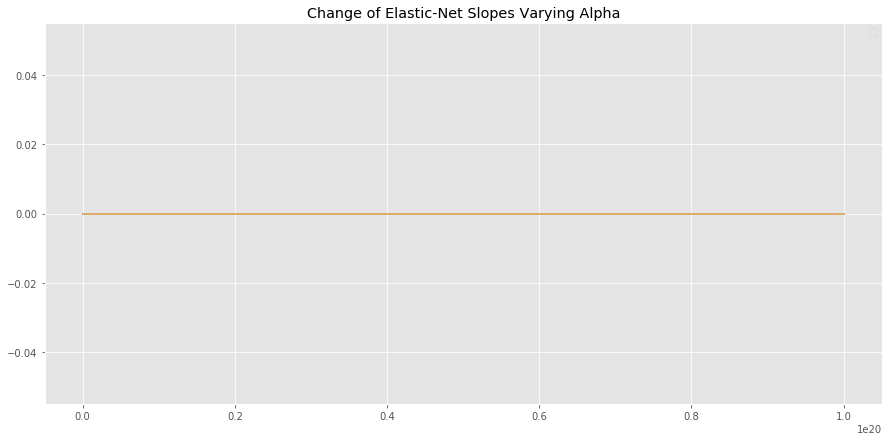

In [297]:
coefs_elastic = pd.DataFrame(np.array(coefs), columns=train_2nd.columns)
for name in coefs_elastic.columns:
    plt.plot(alphas, coefs_elastic[name])
plt.legend(loc=1)    
plt.title('Change of Elastic-Net Slopes Varying Alpha')
plt.savefig('Change of Elastic-Net Slopes Varying Alpha', dpi=250)

In [298]:
elastic.fit(train_2nd,y)
print(elastic.coef_)

[ 0.  0. -0.  0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. -0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0. -0.  0.
  0.  0. -0. -0. -0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0. -0.  0.  0. -0.
  0. -0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0.  0.  0. -0.  0.
  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0.
 -0. -0.  0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.  0.
 -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0.  0.  0.  0.
 -0. -0. -0.  0. -0. -0. -0. -0. -0. -0.  0.]


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Change of Ridge Slopes Varying Alpha')

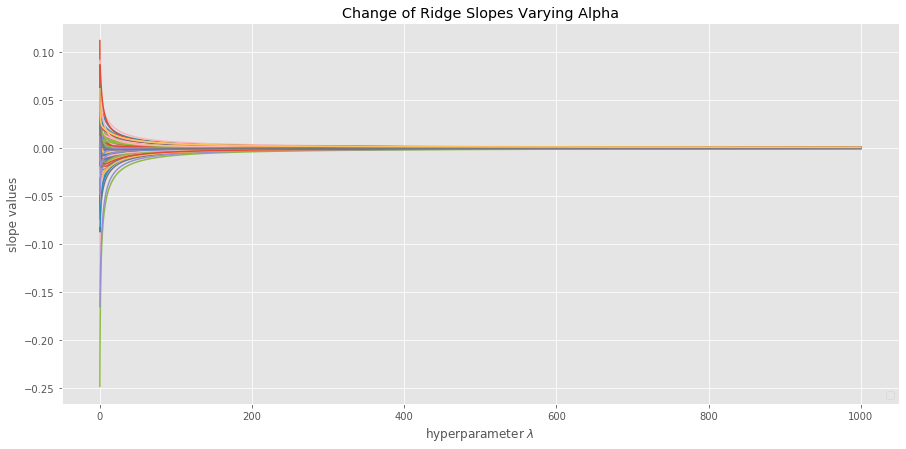

In [193]:
plt.rcParams['figure.figsize'] = (15,7)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name])
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.title('Change of Ridge Slopes Varying Alpha')
plt.savefig('Change of Ridge Slopes Varying Alpha', dpi=250)

In [197]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(-5,3,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize = True)  
    lasso.fit(train_2nd, y)
    intercepts.append(lasso.intercept_)
    coefs.append(lasso.coef_)
    R2.append(lasso.score(train_2nd, y))

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Change of Lasso Slopes Varying Alpha')

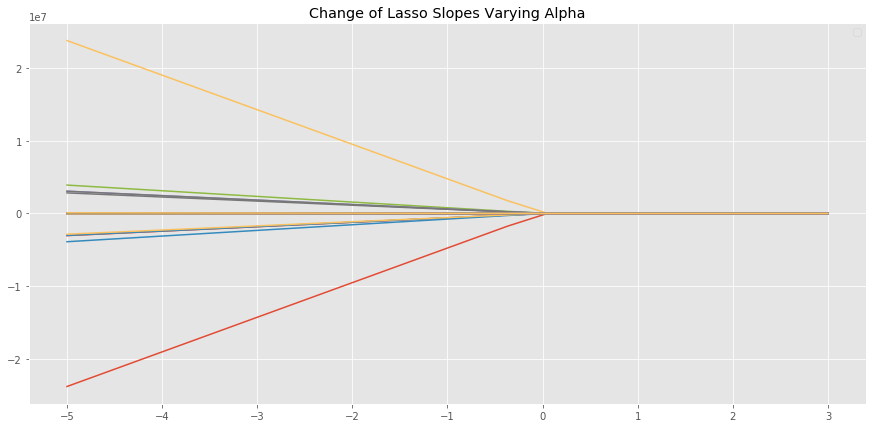

In [200]:
coefs_lasso = pd.DataFrame(np.array(coefs), columns=train_2nd.columns)
for name in coefs.columns:
    plt.plot(alphaRange, coefs_lasso[name])
plt.legend(loc=1)    
plt.title('Change of Lasso Slopes Varying Alpha')


In [224]:
train_2nd

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,YrSold,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MoSold__2,MoSold__3,MoSold__4,MoSold__5,MoSold__6,MoSold__7,MoSold__8,MoSold__9,MoSold__10,MoSold__11,MoSold__12,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Alley__NoAlley,Alley__Pave,LotShape__IR2,LotShape__IR3,LotShape__Reg,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,Neighborhood__Band_2,Neighborhood__Band_3,Neighborhood__Band_4,Neighborhood__Band_5,Neighborhood__Band_6,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Unf,HouseStyle__2.5Unf,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Mansard,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__HdBoard,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__NoMasVnr,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__NA,BsmtFinType1__Rec,BsmtFinType1__Unf,Electrical__FuseF,Electrical__FuseP,Electrical__SBrkr,Functional__Maj2,Functional__Min1,Functional__Mod,Functional__Typ,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,GarageFinish__NA,GarageFinish__RFn,GarageFinish__Unf,PavedDrive__P,PavedDrive__Y,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__NoFence,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
0,65.0,9.041922,1,7,5,9,9,196.0,4,3,4,1,150,856,5,1,856,1710,1,0,2,1,3,1,4,8,0,0,9,2,548,3,0,61,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9.169518,1,6,8,36,36,0.0,3,3,4,4,284,1262,5,1,1262,1262,0,1,2,0,3,1,3,6,1,3,36,2,460,3,298,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,9.328123,1,7,5,11,10,162.0,4,3,4,2,434,920,5,1,920,1786,1,0,2,1,3,1,4,6,1,3,11,2,608,3,0,42,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9.164296,1,7,5,97,42,0.0,3,3,3,1,540,756,4,1,961,1717,1,0,1,0,3,1,4,7,1,4,14,3,642,3,0,35,272,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [225]:
x_train, x_test, y_train, y_test = ms.train_test_split(train_2nd,y,test_size=1.0/5)
ridge = Ridge(alpha = .01, normalize=True)
model_ridge = ridge.fit(x_train, y_train)

ypred_ridge = model_ridge.predict(x_test)
score = model_ridge.score(x_test, y_test)
mse = mean_squared_error(y_test, ypred_ridge)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.4f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.932, MSE:0.01, RMSE:0.1037


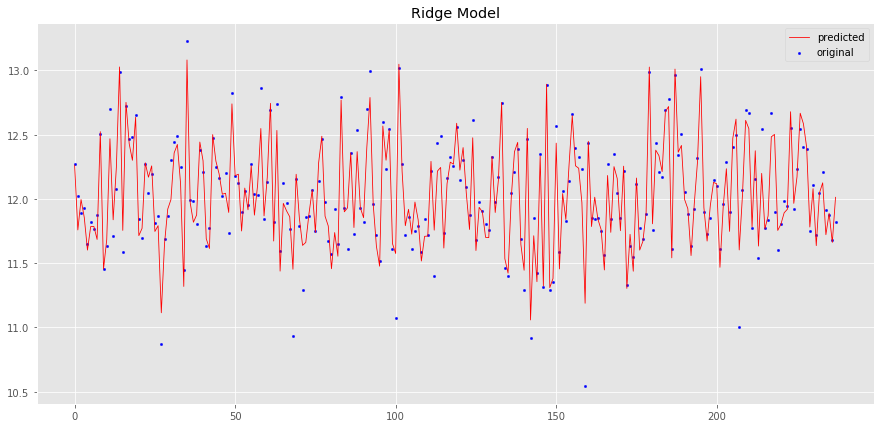

In [30]:
matplotlib.rcParams['figure.figsize'] = (15,7)
x_ax = range(len(x_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred_ridge, lw=0.8, color="red", label="predicted")
plt.title('Ridge Model')
plt.legend()
plt.show()

In [277]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)

In [185]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha, normalize=False)  
    ridge.fit(X_train, Y_train)
    train_R2.append(ridge.score(X_train, Y_train))
    test_R2.append(ridge.score(X_test, Y_test))

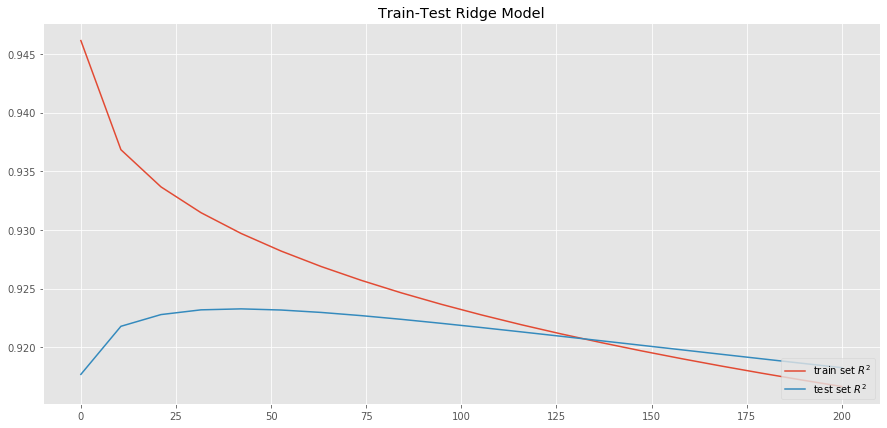

In [187]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.title('Train-Test Ridge Model')
plt.legend(loc=4)
plt.savefig('Train_Test_Ridge.png', dpi=250)

In [162]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(-3,3,100)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize=True, max_iter=2000)  
    lasso.fit(X_train, Y_train)
    train_R2.append(lasso.score(X_train, Y_train))
    test_R2.append(lasso.score(X_test,Y_test))

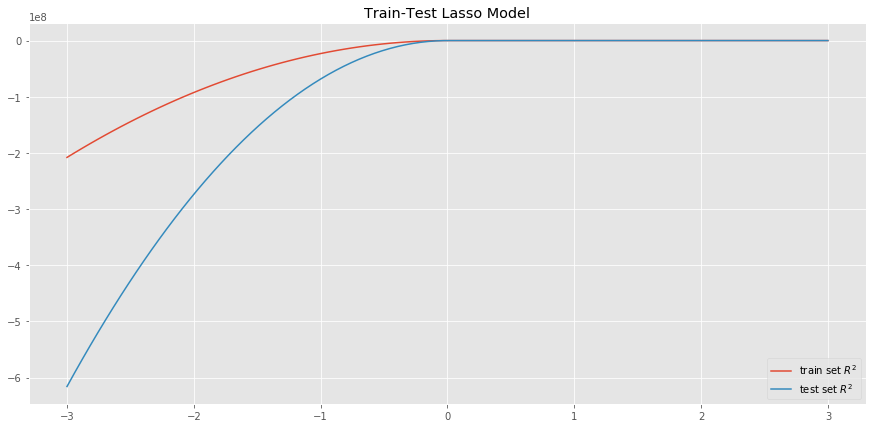

In [163]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.title('Train-Test Lasso Model')
plt.legend(loc=4)
plt.savefig('Train_Test_Lasso.png', dpi=250)

In [52]:
net = ElasticNet()
train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
    net.set_params(alpha=alpha, normalize=True, max_iter=10000)  
    net.fit(X_train, Y_train)
    train_R2.append(net.score(X_train, Y_train))
    test_R2.append(net.score(X_test,Y_test))

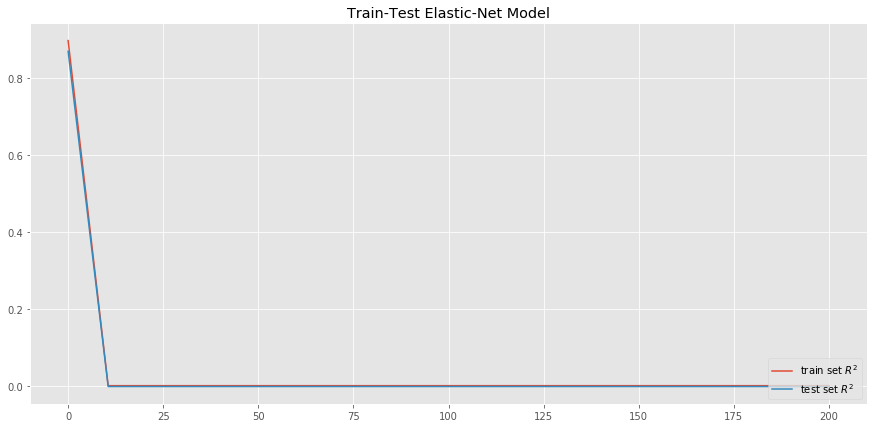

In [160]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.title('Train-Test Elastic-Net Model')
plt.legend(loc=4)
plt.savefig('Train_Test_Enet.png', dpi=250)

# Elastic-Net Model

In [257]:

elastic_cv = ElasticNetCV(alphas=np.logspace(-6, 0, 120), cv=5)
model_elastic = elastic_cv.fit(x_train, y_train)
print('best alpha:',model_elastic.alpha_)
print('intercept:' ,model_elastic.intercept_)

best alpha: 0.0013367506999197077
intercept: 9.761305245086978


In [245]:

elastic = ElasticNet(alpha=0.0002955209235202888, normalize=True)
model_elastic = elastic.fit(x_train, y_train)

ypred_elastic = model_elastic.predict(x_test)
score = model_elastic.score(x_test, y_test)
mse = mean_squared_error(y_test, ypred_elastic)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.4f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.934, MSE:0.01, RMSE:0.0984


In [258]:
ypred_elastic = model_elastic.predict(x_test)
score = model_elastic.score(x_test, y_test)
mse = mean_squared_error(y_test, ypred_elastic)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.4f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.919, MSE:0.01, RMSE:0.1181


In [284]:
0.0984**2

0.00968256

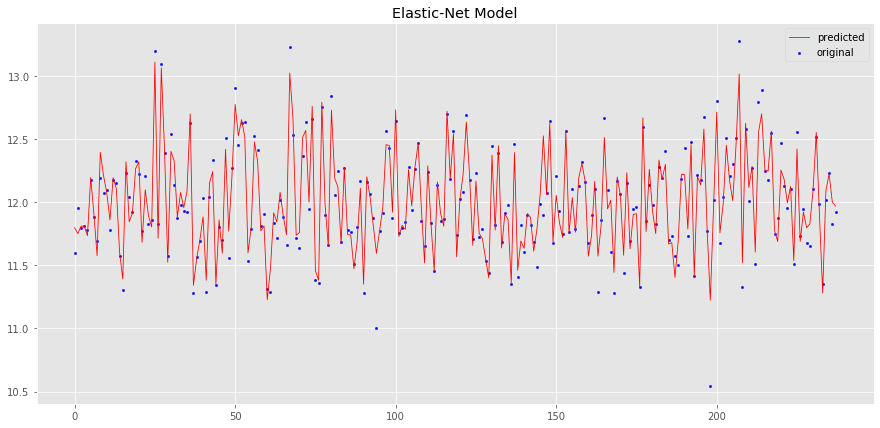

In [299]:
matplotlib.rcParams['figure.figsize'] = (15,7)
x_ax = range(len(x_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred_elastic, lw=0.8, color="red", label="predicted")
plt.legend()
plt.title('Elastic-Net Model')
plt.show()

In [ ]:
pip install mlxtend

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4003, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2000,
                             reg_alpha=1, reg_lambda=0.5,
                             subsample=0.75, silent=1,
                             random_state =77, nthread = -1)

GBoost = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=3, max_features='sqrt',
                                   min_samples_leaf=10, min_samples_split=5, 
                                   loss='huber', random_state =26)

In [ ]:
from mlxtend.regressor import StackingRegressor
stack = StackingRegressor(regressors=(ridge, lasso, elastic_cv, model_xgb, GBoost),
                            meta_regressor=lasso)

Lmse2 = []
for i in range(5):
    x_train, x_test, y_train, y_test = ms.train_test_split(train_2nd, y, 
                                                       test_size=1.0/5, random_state=i)
    stack.fit(x_train.values, y_train)
    rmse = np.sqrt(np.mean((stack.predict(x_test.values)-y_test)**2))
    Lmse2.append(rmse)
print(np.mean(Lmse2))

In [152]:
elastic_cv.fit(train_2nd,y)
Price = elastic_cv.predict(test_1st)
#predict = pd.DataFrame({'Id':range(1461,2920),
 #                           'SalePrice': np.exp(Price)})
newPrice = np.exp(Price)

In [153]:
predict = pd.DataFrame({'SalesPrice':newPrice})
predict['Id'] = test_1st['Id']


KeyError: 'Id'

In [127]:
submission = predict['Id'],predict['SalesPrice']
submission = predict[['Id', 'SalesPrice']]
submission.columns = ['Id', 'SalePrice']
submission['Id'] = submission['Id'].astype('Int32')
submission.to_csv('ML_project_submission_3.csv',index=False)

In [128]:
submission

,Id,SalePrice
0,1461,115561.327711
1,1462,163654.981588
2,1463,180741.127800
3,1464,202145.912575
4,1465,196399.855389
...,...,...
1451,2912,89018.559438
1452,2913,83045.701743
1453,2914,168490.868991
1454,2915,117884.547901


In [142]:
train_list = train_2nd.columns.to_list()

In [ ]:
['Id', 'MSSubClass__150', 'RoofStyle__Shed', 'Functional__Sev']
['HouseStyle__2.5Fin', 'Exterior1st__ImStucc', 'Exterior1st__Stone', 'Exterior2nd__Other', 'Electrical__Mix']

In [147]:
test_list = test_1st.columns.to_list()
test_list

['LotFrontage',
 'LotArea',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtExposure',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolQC',
 'YrSold',
 'MSSubClass__30',
 'MSSubClass__40',
 'MSSubClass__45',
 'MSSubClass__50',
 'MSSubClass__60',
 'MSSubClass__70',
 'MSSubClass__75',
 'MSSubClass__80',
 'MSSubClass__85',
 'MSSubClass__90',
 'MSSubClass__120',
 'MSSubClass__150',
 'MSSubClass__160',
 'MSSubClass__180',
 'MSSubClass__190',
 'MoSold__2',
 'MoSold__3',
 'MoSold__4',
 'MoSold__5',
 'MoSold__6',
 'MoSold__7',
 'MoSold__8',
 'MoSold__9',
 'MoSold__10',


In [148]:
new_list = []
for i in test_list:
    if i not in train_list:
        new_list.append(i)
print(new_list)

['2ndFlrSF', 'MSSubClass__150', 'BldgType__2fmCon', 'HouseStyle__1Story', 'HouseStyle__2Story', 'RoofStyle__Hip', 'RoofStyle__Shed', 'Exterior1st__CemntBd', 'Exterior2nd__MetalSd', 'Exterior2nd__VinylSd', 'MasVnrType__BrkFace', 'Functional__Min2', 'Functional__Sev', 'GarageType__Attchd']


In [71]:
test_new.drop(['SalesPrice'],axis=1,inplace=True)

In [149]:
test_1st.drop(['2ndFlrSF', 'MSSubClass__150', 'BldgType__2fmCon', 'HouseStyle__1Story', 'HouseStyle__2Story', 'RoofStyle__Hip', 'RoofStyle__Shed', 'Exterior1st__CemntBd', 'Exterior2nd__MetalSd', 'Exterior2nd__VinylSd', 'MasVnrType__BrkFace', 'Functional__Min2', 'Functional__Sev', 'GarageType__Attchd'],axis=1,inplace=True)

In [79]:
train_2nd.drop(['HouseStyle__2.5Fin', 'Exterior1st__ImStucc', 'Exterior1st__Stone', 'Exterior2nd__Other', 'Electrical__Mix'],axis=1,inplace=True)

In [135]:
train_2nd

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,YrSold,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MoSold__2,MoSold__3,MoSold__4,MoSold__5,MoSold__6,MoSold__7,MoSold__8,MoSold__9,MoSold__10,MoSold__11,MoSold__12,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Alley__NoAlley,Alley__Pave,LotShape__IR2,LotShape__IR3,LotShape__Reg,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,Neighborhood__Band_2,Neighborhood__Band_3,Neighborhood__Band_4,Neighborhood__Band_5,Neighborhood__Band_6,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Unf,HouseStyle__2.5Unf,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Mansard,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__HdBoard,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__NoMasVnr,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__NA,BsmtFinType1__Rec,BsmtFinType1__Unf,Electrical__FuseF,Electrical__FuseP,Electrical__SBrkr,Functional__Maj2,Functional__Min1,Functional__Mod,Functional__Typ,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,GarageFinish__NA,GarageFinish__RFn,GarageFinish__Unf,PavedDrive__P,PavedDrive__Y,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__NoFence,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
0,65.0,9.041922,1,7,5,9,9,196.0,4,3,4,1,150,856,5,1,856,1710,1,0,2,1,3,1,4,8,0,0,9,2,548,3,0,61,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9.169518,1,6,8,36,36,0.0,3,3,4,4,284,1262,5,1,1262,1262,0,1,2,0,3,1,3,6,1,3,36,2,460,3,298,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,9.328123,1,7,5,11,10,162.0,4,3,4,2,434,920,5,1,920,1786,1,0,2,1,3,1,4,6,1,3,11,2,608,3,0,42,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9.164296,1,7,5,97,42,0.0,3,3,3,1,540,756,4,1,961,1717,1,0,1,0,3,1,4,7,1,4,14,3,642,3,0,35,272,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [157]:
new_sub = pd.DataFrame({'Id':range(1461,2920),
                            'SalePrice': np.exp(Price)})

In [159]:
new_sub.to_csv('ML_project_submission_final.csv',index=False)

In [282]:
x_train, x_test, y_train, y_test = ms.train_test_split(X,y,test_size=1.0/5)

In [271]:
# Elastic
elastic = ElasticNet(alpha=0.0002955209235202888, normalize=True)
model_elastic = elastic.fit(x_train, y_train)

ypred_elastic = model_elastic.predict(x_test)
score = model_elastic.score(x_test, y_test)
mse = mean_squared_error(y_test, ypred_elastic)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.9131, MSE:0.0138, RMSE:0.1173


In [283]:
# Elastic
elastic = ElasticNet(alpha=0.0002955209235202888, normalize=True)
model_elastic = elastic.fit(x_train, y_train)

ypred_elastic = model_elastic.predict(x_test)
score = model_elastic.score(x_test, y_test)
mse = mean_squared_error(y_test, ypred_elastic)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.9163, MSE:0.0148, RMSE:0.1215


In [272]:
# Ridge
ridge = Ridge(alpha = .01, normalize=True)
model_ridge = ridge.fit(x_train, y_train)

ypred_ridge = model_ridge.predict(x_test)
score = model_ridge.score(x_test, y_test)
mse = mean_squared_error(y_test, ypred_ridge)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.9176, MSE:0.0130, RMSE:0.1142


In [273]:
#Lasso
lasso = Lasso(alpha = 2.66e-05, normalize=True)
model_lasso = lasso.fit(x_train, y_train)

ypred_lasso = model_lasso.predict(x_test)
score = model_lasso.score(x_test, y_test)
mse = mean_squared_error(y_test, ypred_lasso)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.9231, MSE:0.0122, RMSE:0.1103


In [253]:
final = elastic.fit(train_2nd,y)
Price = final.predict(test_1st)
final2 = pd.DataFrame({'Id':range(1461,2920),
                            'SalePrice': np.exp(Price)})

In [254]:
final2.to_csv('ML_project_submission_final2.csv',index=False)

In [ ]:
#Lasso

ypred_lasso = model_lasso.predict(test_1st)
score = model_lasso.score(test_1st,y)
